## Name: Patel Vidhi Bhaveshkumar

---

## AICTE ID: STU67cee0f657d301741611254

---

## College Name: C.K.Pithawala College of Engineering and Technology

---

## Project Title: Predicitng Brain Stroke

---

###   Brain stroke is one of the major causes of death and long-term disability globally.Traditional methods oftern depends on manual analysis, which can be time-consuming and open to human error.
###    The proposed solution has the goal to solve the issue of forecasting the risk of stroke in a patient based on health, demographic, and lifestyle information through utilizing data analytics and machine learning algorithms to come up with a good predictive model.



### Dataset has been taken from kaggle.

### Dataset-> https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset


By using this dataset, we train ML Model such as Logisitc regression and Nueral netwrok for prediciting Brain stroke.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

## Dataset information

In [ ]:
df = pd.read_csv("Brain_Stroke_Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.shape

(4981, 11)

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


# Data Visualization

## 1. Stroke Count (Target Distribution)

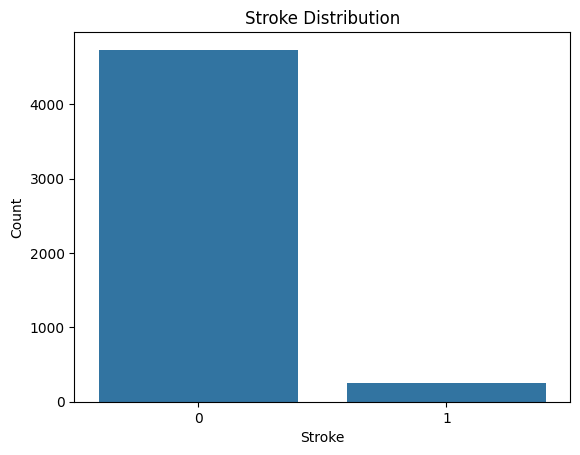

In [ ]:
sns.countplot(x='stroke', data=df)
plt.title('Stroke Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

 ## 2. Age Distribution by Stroke

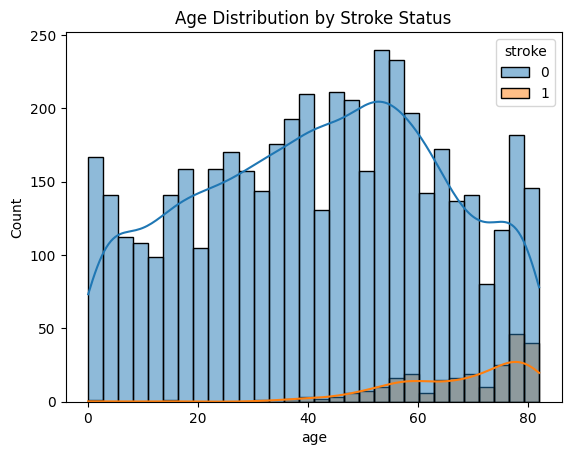

In [ ]:
sns.histplot(data=df, x='age', hue='stroke', kde=True, bins=30)
plt.title('Age Distribution by Stroke Status')
plt.show()


## 3. Stroke Rate by Gender

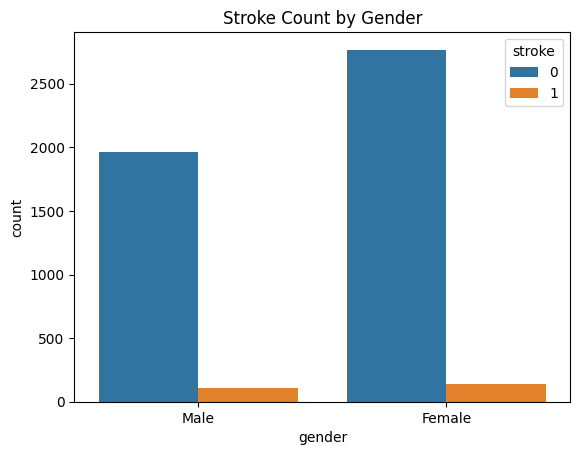

In [ ]:
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Stroke Count by Gender')
plt.show()

## 4.Glucose vs BMI with Stroke Hue

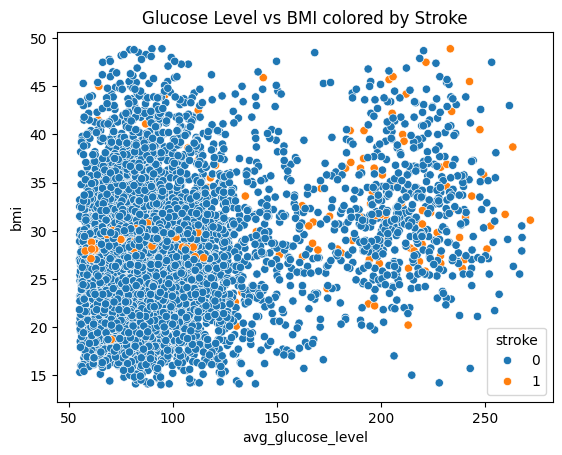

In [ ]:
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', hue='stroke')
plt.title('Glucose Level vs BMI colored by Stroke')
plt.show()


## 5.Work Type vs Stroke

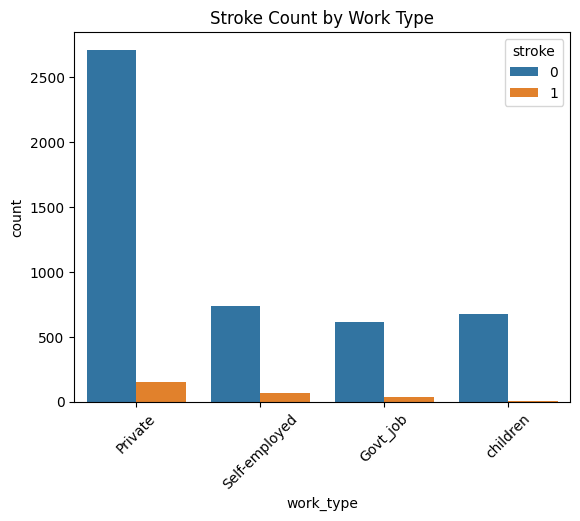

In [ ]:
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Stroke Count by Work Type')
plt.xticks(rotation=45)
plt.show()


# Model Training

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns using one-hot encoding method...
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [ ]:
# Features and target selection
X = df.drop('stroke', axis=1)
y = df['stroke']

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

## Logistic Regression Model

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
[[947   0]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Neural Network (MLPClassifier) Model

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
y_pred_nn = mlp.predict(X_test)

print("Neural Network Results:")
print(confusion_matrix(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


Neural Network Results:
[[922  25]
 [ 45   5]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       947
           1       0.17      0.10      0.12        50

    accuracy                           0.93       997
   macro avg       0.56      0.54      0.54       997
weighted avg       0.91      0.93      0.92       997



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


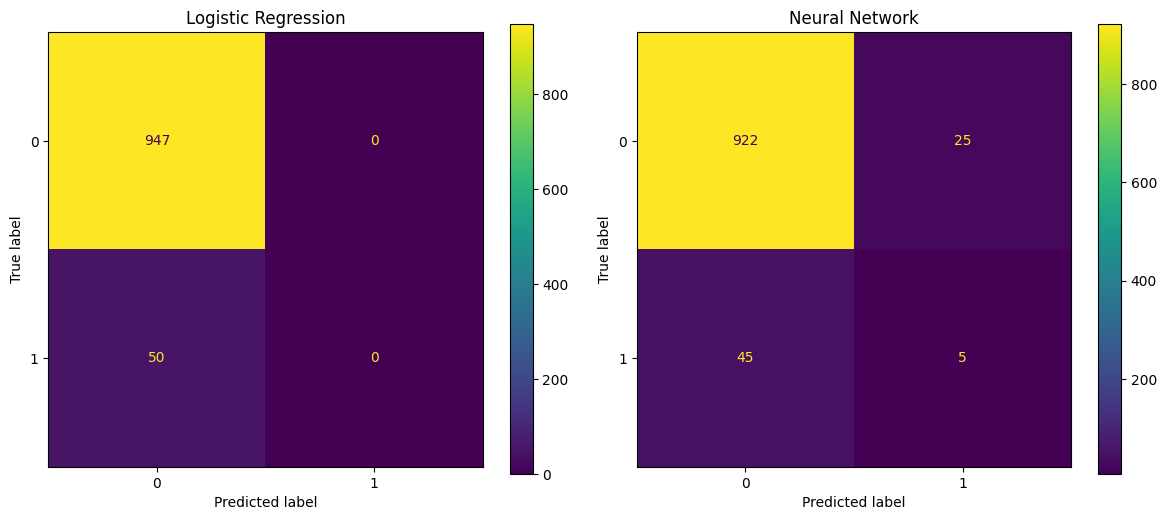

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, ax=axes[0])
axes[0].set_title("Logistic Regression")

# Neural Network Confusion Matrix
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test, ax=axes[1])
axes[1].set_title("Neural Network")

plt.tight_layout()
plt.show()


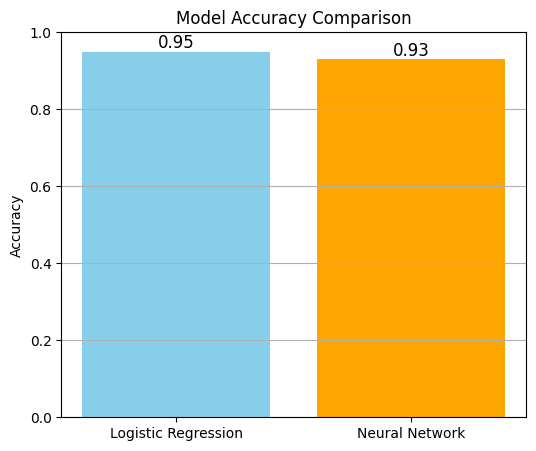

In [ ]:
# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
nn_accuracy = accuracy_score(y_test, y_pred_nn)

# Model names and accuracy values
models = ['Logistic Regression', 'Neural Network']
accuracies = [lr_accuracy, nn_accuracy]

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(axis='y')

# Show accuracy value on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', fontsize=12)

plt.show()


As per both models....Both working really well...

Now for predicitng stroke... I will provide 10 sample dataset then check now efficiently both model work...

In [ ]:
temp_data = pd.DataFrame({
    'gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
    'age': [67, 57, 80, 4, 76, 81, 48, 14, 57, 14],
    'hypertension': [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
    'heart_disease': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ever_married': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No'],
    'work_type': ['Private', 'Self-employed', 'Self-employed', 'children', 'Private', 'Self-employed', 'Private', 'Private', 'Private', 'children'],
    'Residence_type': ['Urban', 'Urban', 'Urban', 'Urban', 'Rural', 'Rural', 'Rural', 'Rural', 'Rural', 'Rural'],
    'avg_glucose_level': [228.69, 68.02, 68.56, 97.51, 225.6, 210.23, 84.56, 103.44, 84.96, 57.93],
    'bmi': [36.6, 37.5, 26.2, 22.0, 29.0, 30.7, 41.8, 20.1, 36.7, 30.9],
    'smoking_status': ['formerly smoked', 'never smoked', 'Unknown', 'Unknown', 'never smoked',
                       'never smoked', 'never smoked', 'never smoked', 'Unknown', 'Unknown']
})

In [ ]:
# encoding object columns

le = LabelEncoder()
temp_data['gender'] = le.fit_transform(temp_data['gender'])
temp_data['ever_married'] = le.fit_transform(temp_data['ever_married'])
temp_data['work_type'] = le.fit_transform(temp_data['work_type'])
temp_data['Residence_type'] = le.fit_transform(temp_data['Residence_type'])
temp_data['smoking_status'] = le.fit_transform(temp_data['smoking_status'])


In [ ]:
# Scale the data
temp_data_scaled = scaler.transform(temp_data)

# Predict using trained models
pred_lr = log_reg.predict(temp_data_scaled)
pred_nn = mlp.predict(temp_data_scaled)


In [ ]:
#Show predictions
print("🔹 Logistic Regression Predictions:", pred_lr)
print("🔸 Neural Network Predictions:", pred_nn)

🔹 Logistic Regression Predictions: [0 0 0 0 0 0 0 0 0 0]
🔸 Neural Network Predictions: [0 1 1 0 0 0 0 0 0 0]


In [ ]:
# Add actual and predicted values to the DataFrame
temp_data['Actual'] = [0, 1, 1, 0, 0, 0, 0, 0, 1, 1]
temp_data['Pred_LR'] = pred_lr
temp_data['Pred_NN'] = pred_nn

# Display comparison table
comparison = temp_data[['age', 'gender', 'hypertension', 'heart_disease',
                        'avg_glucose_level', 'bmi', 'Actual', 'Pred_LR', 'Pred_NN']]

print("\n🔍 Comparison: Actual vs. Predictions")
comparison



🔍 Comparison: Actual vs. Predictions


,age,gender,hypertension,heart_disease,avg_glucose_level,bmi,Actual,Pred_LR,Pred_NN
0,67,1,0,1,228.69,36.6,0,0,0
1,57,0,0,0,68.02,37.5,1,0,1
2,80,0,1,0,68.56,26.2,1,0,1
3,4,1,0,0,97.51,22.0,0,0,0
4,76,1,1,0,225.60,29.0,0,0,0
5,81,0,1,0,210.23,30.7,0,0,0
6,48,0,0,0,84.56,41.8,0,0,0
7,14,1,0,0,103.44,20.1,0,0,0
8,57,1,0,0,84.96,36.7,1,0,0
9,14,0,0,0,57.93,30.9,1,0,0


From above table we can see the comaprision between actucal value and predicited values...

In few predicted values not matching with actual value...reason may be manually created temp data...


---

# Thank you!

---
